In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import latexStrings as ls
import mca

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
import statsmodels.api as sm

%matplotlib qt5

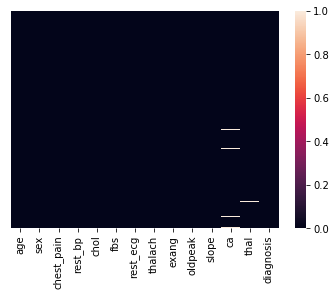

In [2]:
data = pd.read_csv("data/heart.data")
sns.heatmap(data=data.isnull(),yticklabels=False)

In [3]:
data.isnull().sum()/len(data) * 100

age           0.000000
sex           0.000000
chest_pain    0.000000
rest_bp       0.000000
chol          0.000000
fbs           0.000000
rest_ecg      0.000000
thalach       0.000000
exang         0.000000
oldpeak       0.000000
slope         0.000000
ca            1.320132
thal          0.660066
diagnosis     0.000000
dtype: float64

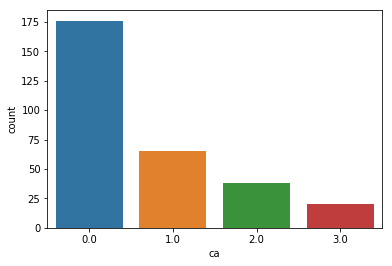

In [4]:
sns.countplot(x = "ca", data = data)

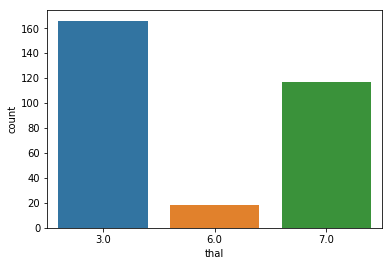

In [5]:
sns.countplot(x = "thal", data = data)

In [6]:
data['ca'] = data['ca'].fillna(0.0)
data['thal'] = data['thal'].fillna(3.0)

In [7]:
data.rename(columns = {"target":"diagnosis", "cp": "chest_pain", "trestbps": "rest_bp",
                      "restecg":"rest_ecg"}, inplace = True)

In [8]:
data.head()

,age,sex,chest_pain,rest_bp,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age           303 non-null float64
sex           303 non-null float64
chest_pain    303 non-null float64
rest_bp       303 non-null float64
chol          303 non-null float64
fbs           303 non-null float64
rest_ecg      303 non-null float64
thalach       303 non-null float64
exang         303 non-null float64
oldpeak       303 non-null float64
slope         303 non-null float64
ca            303 non-null float64
thal          303 non-null float64
diagnosis     303 non-null int64
dtypes: float64(13), int64(1)
memory usage: 33.2 KB


In [10]:
labels = {
    "sex" :["female", "male"],
    "cp" :["typical angina","atypical angina","non-anginal pain","asymptomatic"]
}

In [11]:
# Diccionarios con los nombres de categorias
sex_cat = {0 : "female", 
           1 : "male"}

chest_pain_cat = {1 : "typical angina", 
                  2 : "atypical angina",
                  3 : "non-anginal pain",
                  4 : "asymptomatic"}

# Fasting blood sugar
fbs_cat = {0 : "<= 120mg/dl",
       1 : "> 120mg/dl"}

# Rersting ECG
rest_ecg = {0 : "normal",
            1 : "ST-T wave abnormality",
            2 : "probable left ventricular hypertrophy"}

# Excercise induced angina
exang = {0 : "no",
         1 : "yes"}

# slope of peak excersice ST segment
slope = {1 : "upsloping",
         2 : "flat",
         3 : "downsloping"}

# https://www.medilexicon.com/dictionary/72223
thal = {3 : "normal",
        6 : "fixed defect",
        7 : "reversable defect"}

In [12]:
# Juntar los valores 1, 2, 3, 4 de diagnosis al nuevo valor 1 (para q diagnosis sea v o f)
og_diagnosis = data["diagnosis"].copy()
data["diagnosis"] = np.where(data["diagnosis"] > 0, 1, 0)
data.head()

,age,sex,chest_pain,rest_bp,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


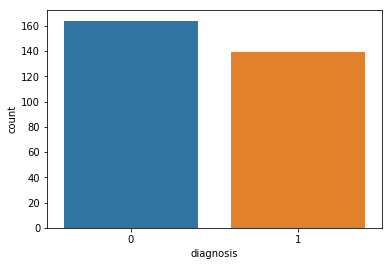

In [13]:
sns.countplot(x = 'diagnosis', data = data)

In [14]:
data.groupby('diagnosis').describe()['oldpeak']

,count,mean,std,min,25%,50%,75%,max
diagnosis,,,,,,,,
0,164.0,0.586585,0.781734,0.0,0.00,0.2,1.025,4.2
1,139.0,1.574101,1.302580,0.0,0.55,1.4,2.500,6.2


In [15]:
data.groupby('sex').describe()['diagnosis']

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
0.0,97.0,0.257732,0.439658,0.0,0.0,0.0,1.0,1.0
1.0,206.0,0.553398,0.498352,0.0,0.0,1.0,1.0,1.0


In [16]:
# Indices de vars categoricas y vars de razon
# ca (11) es categorica? numero de vessels iluminados en fluroscopia
cat_index = [1, 2, 5, 6, 8, 10, 11, 12]
num_index = [0, 3, 4, 7, 9]
data.iloc[:, cat_index].head()

,sex,chest_pain,fbs,rest_ecg,exang,slope,ca,thal
0,1.0,1.0,1.0,2.0,0.0,3.0,0.0,6.0
1,1.0,4.0,0.0,2.0,1.0,2.0,3.0,3.0
2,1.0,4.0,0.0,2.0,1.0,2.0,2.0,7.0
3,1.0,3.0,0.0,0.0,0.0,3.0,0.0,3.0
4,0.0,2.0,0.0,2.0,0.0,1.0,0.0,3.0


In [17]:
data.iloc[:, num_index].head()

,age,rest_bp,chol,thalach,oldpeak
0,63.0,145.0,233.0,150.0,2.3
1,67.0,160.0,286.0,108.0,1.5
2,67.0,120.0,229.0,129.0,2.6
3,37.0,130.0,250.0,187.0,3.5
4,41.0,130.0,204.0,172.0,1.4


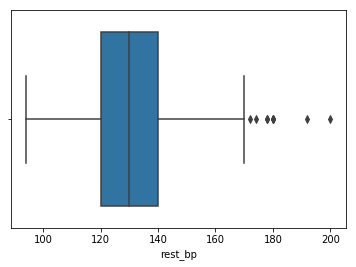

In [18]:
sns.boxplot(x = 'rest_bp', data = data)

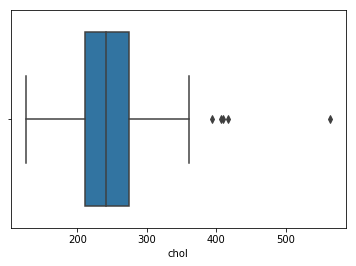

In [19]:
sns.boxplot(x = 'chol', data = data)

In [20]:
max(data['chol'])

564.0

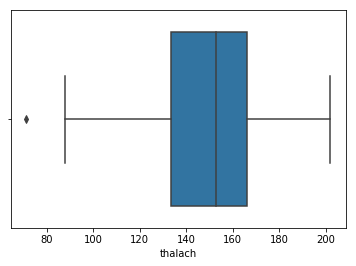

In [21]:
sns.boxplot(x = 'thalach', data = data)

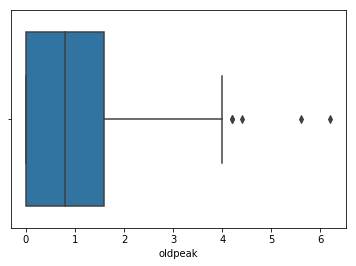

In [22]:
sns.boxplot(x = 'oldpeak', data = data)

In [23]:
max(data['oldpeak'])

6.2

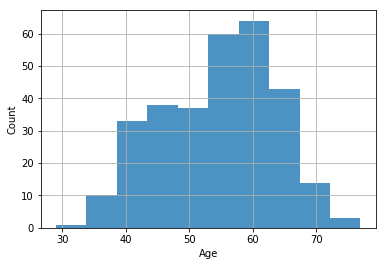

In [24]:
ax = data["age"].hist(alpha=0.8)
ax.set(xlabel='Age', ylabel='Count')
plt.show()

In [25]:
X_num = data.iloc[:, num_index]
X_num_std = X_num.copy()

In [26]:
std = preprocessing.scale(X_num.iloc[:,1:])
X_num_std.iloc[:,1:] = std

In [27]:
X_num_std.head()

,age,rest_bp,chol,thalach,oldpeak
0,63.0,0.757525,-0.264900,0.017197,1.087338
1,67.0,1.611220,0.760415,-1.821905,0.397182
2,67.0,-0.665300,-0.342283,-0.902354,1.346147
3,37.0,-0.096170,0.063974,1.637359,2.122573
4,41.0,-0.096170,-0.825922,0.980537,0.310912


In [28]:
processed_data = X_num_std.join(data.iloc[:, cat_index])

### Analisis Exploratorio

### Tablas de contingencia con pvals de relacion

In [29]:
# Tablas de contingencia de diagnosis vs vars categoricas
for att in data.columns[cat_index]:
    M = []
    print("Var = " + att )
    vals = np.unique(data[att]).astype(int)
    for val in vals:
        M.append([data.query(att + " == " + str(val) + " and diagnosis == 0").shape[0], 
                  data.query(att + " == " + str(val) + " and diagnosis == 1").shape[0]])
    M = np.array(M, dtype = int).T
    print("Matriz de Contingencia: ")
    print(ls.indexedMatrix(M, ['0', '1'], vals))
    pval = sm.stats.Table(M).test_nominal_association().pvalue
    print("p-val: " + str(pval) + "\n")

Var = sex
Matriz de Contingencia: 
\begin{blockarray}{ccc}
 & 0 & 1\\
\begin{block}{c(cc)}
0 & 72 & 92 \\ 
1 & 25 & 114 \\ 
\end{block}
\end{blockarray}
p-val: 1.4463238972028947e-06

Var = chest_pain
Matriz de Contingencia: 
\begin{blockarray}{ccccc}
 & 1 & 2 & 3 & 4\\
\begin{block}{c(cccc)}
0 & 16 & 41 & 68 & 39 \\ 
1 & 7 & 9 & 18 & 105 \\ 
\end{block}
\end{blockarray}
p-val: 0.0

Var = fbs
Matriz de Contingencia: 
\begin{blockarray}{ccc}
 & 0 & 1\\
\begin{block}{c(cc)}
0 & 141 & 23 \\ 
1 & 117 & 22 \\ 
\end{block}
\end{blockarray}
p-val: 0.6601094903412961

Var = rest_ecg
Matriz de Contingencia: 
\begin{blockarray}{cccc}
 & 0 & 1 & 2\\
\begin{block}{c(ccc)}
0 & 95 & 1 & 68 \\ 
1 & 56 & 3 & 80 \\ 
\end{block}
\end{blockarray}
p-val: 0.0065665238142172955

Var = exang
Matriz de Contingencia: 
\begin{blockarray}{ccc}
 & 0 & 1\\
\begin{block}{c(cc)}
0 & 141 & 23 \\ 
1 & 63 & 76 \\ 
\end{block}
\end{blockarray}
p-val: 5.562217353372034e-14

Var = slope
Matriz de Contingencia: 
\begin{blo

In [30]:
# Pval de fbs salio 0.95, se quita de las vars de processed data
processed_data = processed_data.drop(columns=["fbs"])

In [31]:
index = num_index.copy()
index.append(0)

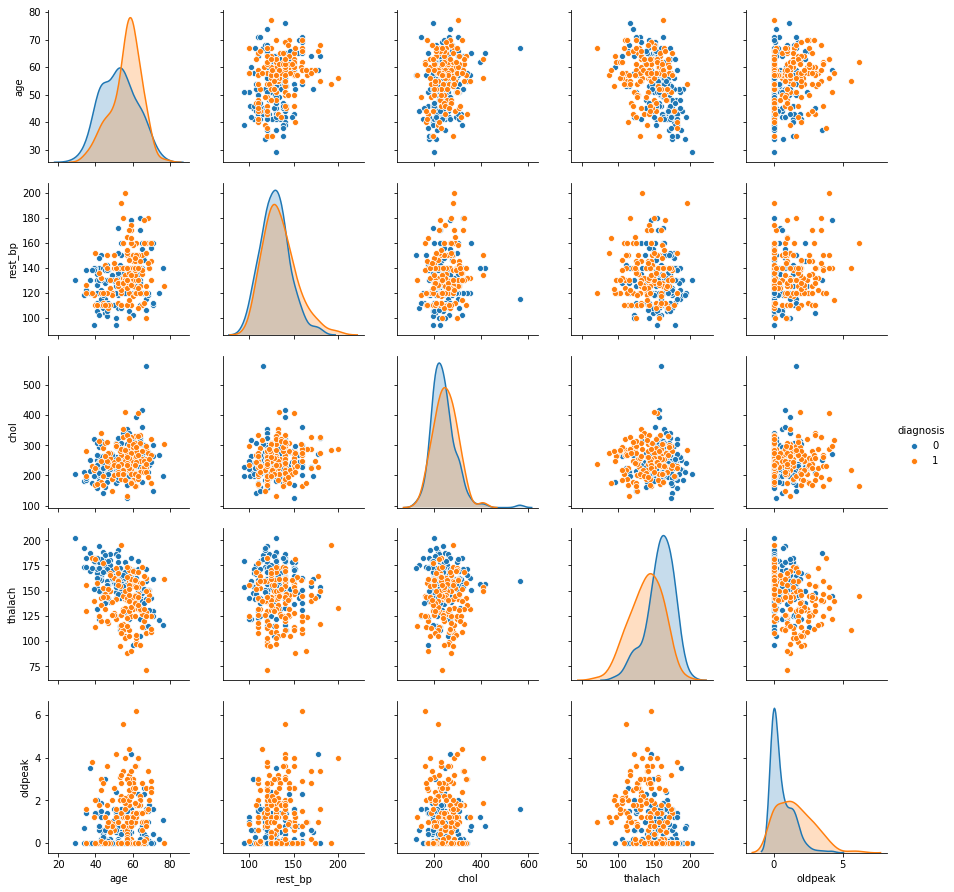

In [32]:
# histogramas para vars 
sns.pairplot(data, vars = data.columns[num_index], hue = "diagnosis")
plt.show()

In [33]:
processed_data['diagnosis'] = data['diagnosis']

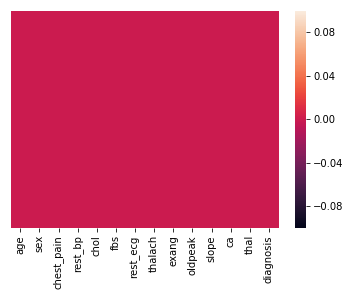

In [34]:
sns.heatmap(data=data.isnull(),yticklabels=False)

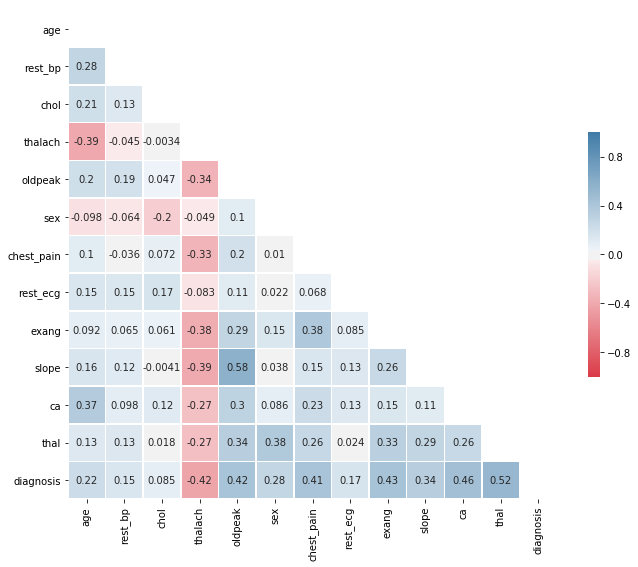

In [35]:
# Correlaciones
corr = processed_data.corr()

# plot correlation matrix
fig = plt.figure(figsize=(11, 9))
mask = np.zeros_like(corr, dtype=np.bool) # create mask to cover the upper triangle
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(10, 240, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmin = -1, vmax = 1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
#plt.savefig('graphs/correlaciones.png', dpi = 300)

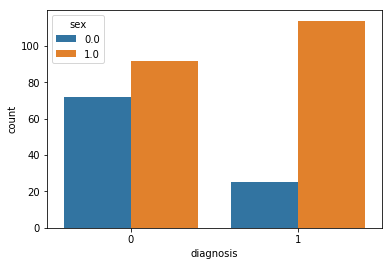

In [36]:
sns.countplot(x="diagnosis", data=processed_data, hue='sex')

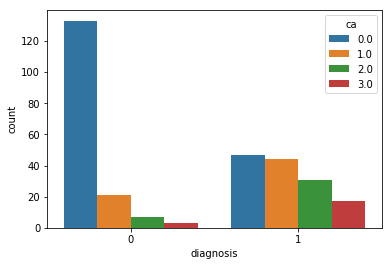

In [37]:
sns.countplot(x="diagnosis", data=processed_data, hue='ca')

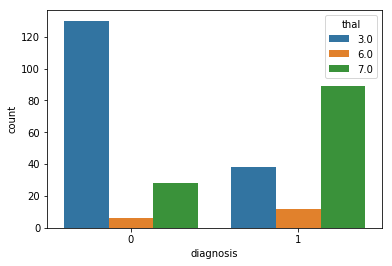

In [38]:
sns.countplot(x="diagnosis", data=processed_data, hue='thal')

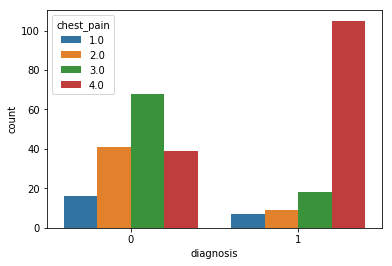

In [39]:
sns.countplot(x="diagnosis", data=processed_data, hue='chest_pain')

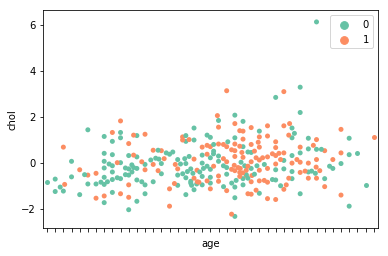

In [40]:
swarmPlot = sns.swarmplot(x = 'age', y = 'chol', data=processed_data, hue='diagnosis', palette='Set2')
swarmPlot.set(xticklabels=[])
swarmPlot.legend(loc='upper right')

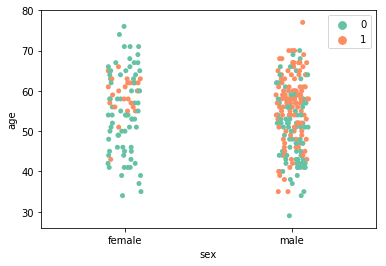

In [41]:
swarmPlot = sns.stripplot(x = 'sex', y = 'age', data=processed_data, hue='diagnosis', palette='Set2')
swarmPlot.set(xticklabels = labels["sex"])
swarmPlot.legend(loc='upper right')

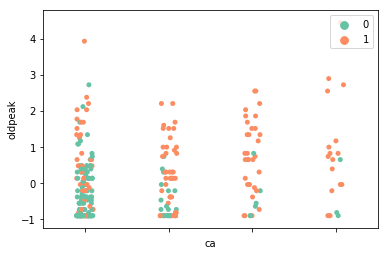

In [42]:
swarmPlot = sns.stripplot(x = 'ca', y = 'oldpeak', data=processed_data, hue='diagnosis', palette='Set2')
swarmPlot.set(xticklabels=[])
swarmPlot.legend(loc='upper right')

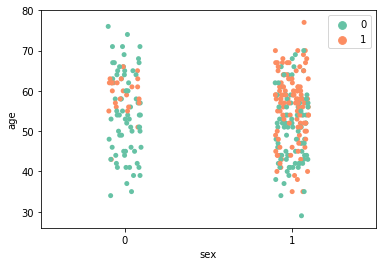

In [43]:
swarmPlot = sns.stripplot(x = 'sex', y = 'age', data=processed_data, hue='diagnosis', palette='Set2')
swarmPlot.set(xticklabels=sex_cat)
swarmPlot.legend(loc='upper right')

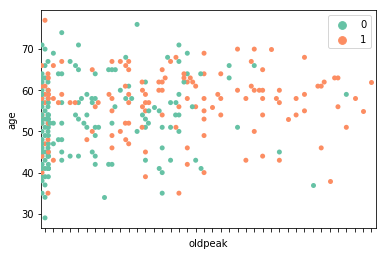

In [44]:
swarmPlot = sns.swarmplot(x = 'oldpeak', y = 'age', data=processed_data, hue='diagnosis', palette='Set2')
swarmPlot.set(xticklabels=[])
swarmPlot.legend(loc='upper right')

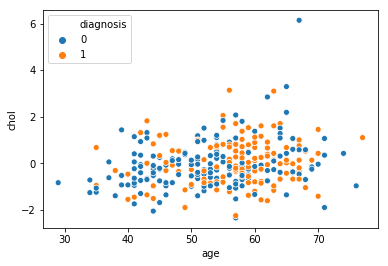

In [45]:
sns.scatterplot(x = 'age', y = 'chol', data = processed_data, hue = 'diagnosis')

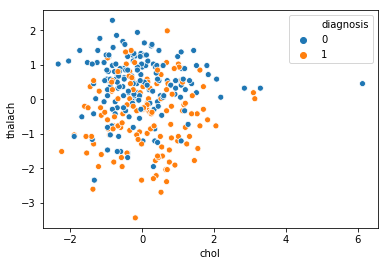

In [46]:
sns.scatterplot(x = 'chol', y = 'thalach', data = processed_data, hue = 'diagnosis')

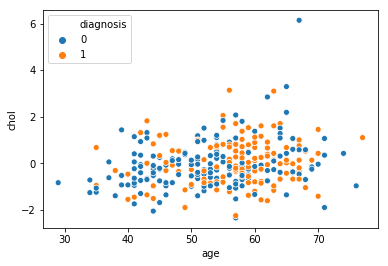

In [47]:
sns.scatterplot(x = 'age', y = 'chol', data = processed_data, hue = 'diagnosis')

### Dummy var

In [50]:
X = processed_data.drop(columns = ['diagnosis'])
y = processed_data['diagnosis']

In [51]:
X['sex'] = processed_data['sex'].map(sex_cat)
X['chest_pain'] = processed_data['chest_pain'].map(chest_pain_cat)
X['rest_ecg'] = processed_data['rest_ecg'].map(rest_ecg)
#X['fbs'] = data['fbs'].map(fbs_cat)
X['exang'] = processed_data['exang'].map(exang)
X['slope'] = processed_data['slope'].map(slope)
X['thal'] = processed_data['thal'].map(thal)

In [52]:
X.isnull().sum()

age           0
rest_bp       0
chol          0
thalach       0
oldpeak       0
sex           0
chest_pain    0
rest_ecg      0
exang         0
slope         0
ca            0
thal          0
dtype: int64

In [53]:
X['age'] = preprocessing.scale(processed_data['age'])

In [54]:
X = pd.get_dummies(X, columns =['sex', 'chest_pain','rest_ecg','exang','slope','thal','ca'], 
                   prefix = ['is','has','ecg','exang','slope','thal','ca'],drop_first = True)

In [55]:
X.head()

,age,rest_bp,chol,thalach,oldpeak,is_male,has_atypical angina,has_non-anginal pain,has_typical angina,ecg_normal,ecg_probable left ventricular hypertrophy,exang_yes,slope_flat,slope_upsloping,thal_normal,thal_reversable defect,ca_1.0,ca_2.0,ca_3.0
0,0.948726,0.757525,-0.264900,0.017197,1.087338,1,0,0,1,0,1,0,0,0,0,0,0,0,0
1,1.392002,1.611220,0.760415,-1.821905,0.397182,1,0,0,0,0,1,1,1,0,1,0,0,0,1
2,1.392002,-0.665300,-0.342283,-0.902354,1.346147,1,0,0,0,0,1,1,1,0,0,1,0,1,0
3,-1.932564,-0.096170,0.063974,1.637359,2.122573,1,0,1,0,1,0,0,0,0,1,0,0,0,0
4,-1.489288,-0.096170,-0.825922,0.980537,0.310912,0,1,0,0,0,1,0,0,1,1,0,0,0,0


### Logit simple

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 158999)

In [57]:
len(y_train)

242

In [58]:
len(y_test)

61

In [59]:
logit = sm.Logit(y_train,X_train)
logit_model = logit.fit()

Optimization terminated successfully.
         Current function value: 0.303696
         Iterations 8


In [60]:
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  242
Model:                          Logit   Df Residuals:                      223
Method:                           MLE   Df Model:                           18
Date:                Wed, 08 May 2019   Pseudo R-squ.:                  0.5547
Time:                        11:33:46   Log-Likelihood:                -73.494
converged:                       True   LL-Null:                       -165.05
                                        LLR p-value:                 2.310e-29
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
age                                          -0.4173      0.269     -1.551      0.121      -0.945       0.110
rest_bp                                       0.5633      0.249      2.258      0.024       0.074       1.052
chol                                          0.2319      0.234      0.991      0.322      -0.227       0.691
thalach                                      -0.3824      0.325     -1.178      0.239      -1.019       0.254
oldpeak                                       0.5348      0.335      1.595      0.111      -0.122       1.192
is_male                                       1.4695      0.633      2.322      0.020       0.229       2.710
has_atypical angina                          -0.9482      0.659     -1.440      0.150      -2.239       0.343
has_non-anginal pain                         -1.9322      0.572     -3.377      0.001      -3.054      -0.811
has_typical angina                           -2.5229      0.789     -3.200      0.001      -4.068      -0.977
ecg_normal                                   -2.5225      1.228     -2.055      0.040      -4.929      -0.116
ecg_probable left ventricular hypertrophy    -1.6432      1.217     -1.350      0.177      -4.029       0.743
exang_yes                                     0.6695      0.555      1.207      0.227      -0.417       1.757
slope_flat                                    0.8260      0.922      0.896      0.370      -0.980       2.632
slope_upsloping                              -0.4519      0.995     -0.454      0.650      -2.402       1.498
thal_normal                                  -0.2398      0.881     -0.272      0.786      -1.967       1.487
thal_reversable defect                        1.3303      0.866      1.535      0.125      -0.368       3.028
ca_1.0                                        2.1417      0.563      3.803      0.000       1.038       3.245
ca_2.0                                        3.2910      0.857      3.840      0.000       1.611       4.971
ca_3.0                                        1.9952      1.055      1.891      0.059      -0.072       4.063
=============================================================================================================
"""

In [76]:
logmodel_1 = LogisticRegression(class_weight = "balanced", solver = "liblinear")
logmodel_1.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [77]:
train_pred_1 = logmodel_1.predict(X_train)
print(logmodel_1.score(X_train,y_train))
confusion_matrix(y_train,train_pred_1)

0.8677685950413223


array([[125,  14],
       [ 18,  85]])

In [78]:
test_pred_1 = logmodel_1.predict(X_test)
print(logmodel_1.score(X_test,y_test))
confusion_matrix(y_test,test_pred_1)

0.8688524590163934


array([[24,  1],
       [ 7, 29]])

Segundo dataframe sin variables con p > 0.05

In [72]:
X_train2 = X_train.drop(columns = ['thalach','thal_normal','thal_reversable defect',
                                  'slope_flat','slope_upsloping','age','chol'])
X_test2 = X_test.drop(columns = ['thalach','thal_normal','thal_reversable defect',
                                  'slope_flat','slope_upsloping','age','chol'])
#,  ,'oldpeak'

In [62]:
logit2 = sm.Logit(y_train,X_train2)
logit_model2 = logit2.fit()

Optimization terminated successfully.
         Current function value: 0.358223
         Iterations 7


In [63]:
logit_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  242
Model:                          Logit   Df Residuals:                      230
Method:                           MLE   Df Model:                           11
Date:                Wed, 08 May 2019   Pseudo R-squ.:                  0.4748
Time:                        11:33:48   Log-Likelihood:                -86.690
converged:                       True   LL-Null:                       -165.05
                                        LLR p-value:                 6.266e-28
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
rest_bp                                       0.4157      0.216      1.926      0.054      -0.007       0.839
oldpeak                                       0.8279      0.257      3.224      0.001       0.325       1.331
is_male                                       1.6332      0.472      3.461      0.001       0.708       2.558
has_atypical angina                          -1.4495      0.601     -2.410      0.016      -2.628      -0.271
has_non-anginal pain                         -1.9303      0.493     -3.914      0.000      -2.897      -0.964
has_typical angina                           -2.5035      0.725     -3.455      0.001      -3.924      -1.083
ecg_normal                                   -2.0118      0.560     -3.591      0.000      -3.110      -0.914
ecg_probable left ventricular hypertrophy    -1.1928      0.555     -2.151      0.031      -2.280      -0.106
exang_yes                                     1.1518      0.460      2.501      0.012       0.249       2.054
ca_1.0                                        1.8811      0.482      3.899      0.000       0.936       2.827
ca_2.0                                        2.3382      0.696      3.358      0.001       0.973       3.703
ca_3.0                                        2.4543      0.907      2.707      0.007       0.677       4.231
=============================================================================================================
"""

In [64]:
logmodel = LogisticRegression(class_weight = "balanced", solver = "liblinear")
logmodel.fit(X_train2,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [71]:
train_pred = logmodel.predict(X_train2)
print(logmodel.score(X_train2,y_train))
confusion_matrix(y_train,train_pred)

0.8429752066115702


array([[120,  19],
       [ 19,  84]])

In [73]:
test_pred = logmodel.predict(X_test2)
print(logmodel.score(X_test2,y_test))
confusion_matrix(y_test,test_pred)

0.8524590163934426


array([[23,  2],
       [ 7, 29]])

### LDA

In [93]:
X_numerical_train = X_train.iloc[:, 0:5]
X_numerical_test = X_test.iloc[:, 0:5]
X_numerical_train.head()

,age,rest_bp,chol,thalach,oldpeak
44,0.727089,-0.096170,1.611621,0.849172,-0.896862
91,0.837908,1.611220,-1.599745,-0.201743,4.451851
162,-0.048643,-1.234430,-0.632466,0.367503,0.483451
110,0.727089,0.757525,1.166672,-0.157955,-0.034166
21,0.394632,1.042090,0.702378,0.542655,-0.034166


In [94]:
lda = LinearDiscriminantAnalysis(n_components = None)

In [96]:
lda_train = lda.fit_transform(X_numerical_train, y_train)
lda_test = lda.transform(X_numerical_test)

In [101]:
X_lda_train = X_train.iloc[:,5:]
X_lda_train["x_1"] = lda_train
X_lda_train.head()

,is_male,has_atypical angina,has_non-anginal pain,has_typical angina,ecg_normal,ecg_probable left ventricular hypertrophy,exang_yes,slope_flat,slope_upsloping,thal_normal,thal_reversable defect,ca_1.0,ca_2.0,ca_3.0,x_1
44,0,0,0,0,0,1,0,0,1,1,0,0,0,0,-1.235772
91,0,0,0,0,0,1,0,0,0,0,1,0,0,1,3.201330
162,0,0,1,0,1,0,0,1,0,1,0,0,0,0,-0.299750
110,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0.277229
21,0,0,0,1,0,1,0,0,1,1,0,0,0,0,-0.206058


In [103]:
X_lda_test = X_test.iloc[:,5:]
X_lda_test["x_1"] = lda_test
X_lda_test.head()

,is_male,has_atypical angina,has_non-anginal pain,has_typical angina,ecg_normal,ecg_probable left ventricular hypertrophy,exang_yes,slope_flat,slope_upsloping,thal_normal,thal_reversable defect,ca_1.0,ca_2.0,ca_3.0,x_1
8,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0.140092
81,0,0,0,0,0,1,0,1,0,1,0,0,0,0,-0.104690
157,1,0,0,0,0,1,0,0,1,0,1,0,1,0,-1.376758
205,1,0,0,0,0,1,1,1,0,0,1,0,0,1,-0.088324
18,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0.027721


In [104]:
X_lda_train = X_lda_train.drop(columns = ['thal_normal','thal_reversable defect',
                                  'slope_flat','slope_upsloping'])
X_lda_test = X_lda_test.drop(columns = ['thal_normal','thal_reversable defect',
                                  'slope_flat','slope_upsloping'])

In [105]:
lda_logit = sm.Logit(y_train, X_lda_train)
lda_logit_model = lda_logit.fit()

lda_logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.351257
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  242
Model:                          Logit   Df Residuals:                      231
Method:                           MLE   Df Model:                           10
Date:                Wed, 08 May 2019   Pseudo R-squ.:                  0.4850
Time:                        11:49:24   Log-Likelihood:                -85.004
converged:                       True   LL-Null:                       -165.05
                                        LLR p-value:                 3.091e-29
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
is_male                                       1.8351      0.476      3.854      0.000       0.902       2.768
has_atypical angina                          -1.2179      0.612     -1.989      0.047      -2.418      -0.018
has_non-anginal pain                         -1.6941      0.480     -3.532      0.000      -2.634      -0.754
has_typical angina                           -2.2098      0.706     -3.129      0.002      -3.594      -0.826
ecg_normal                                   -2.0145      0.551     -3.659      0.000      -3.094      -0.935
ecg_probable left ventricular hypertrophy    -1.2529      0.534     -2.348      0.019      -2.299      -0.207
exang_yes                                     0.8396      0.483      1.740      0.082      -0.106       1.786
ca_1.0                                        1.5965      0.485      3.293      0.001       0.646       2.547
ca_2.0                                        2.4923      0.686      3.633      0.000       1.148       3.837
ca_3.0                                        1.7708      0.916      1.933      0.053      -0.025       3.566
x_1                                           0.9564      0.231      4.134      0.000       0.503       1.410
=============================================================================================================
"""

In [107]:
log_lda = LogisticRegression(class_weight = "balanced", solver = "liblinear")
log_lda.fit(X_lda_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [108]:
lda_train_pred = log_lda.predict(X_lda_train)
print(log_lda.score(X_lda_train,y_train))
confusion_matrix(y_train,lda_train_pred)

0.8512396694214877


array([[121,  18],
       [ 18,  85]])

In [109]:
lda_test_pred = log_lda.predict(X_lda_test)
print(log_lda.score(X_lda_test,y_test))
confusion_matrix(y_test,lda_test_pred)

0.8688524590163934


array([[24,  1],
       [ 7, 29]])

## Sets de entrenamiento

In [150]:
X_train.head()

,age,rest_bp,chol,thalach,oldpeak,is_male,has_atypical angina,has_non-anginal pain,has_typical angina,ecg_normal,ecg_probable left ventricular hypertrophy,exang_yes,slope_flat,slope_upsloping,thal_normal,thal_reversable defect,ca_1.0,ca_2.0,ca_3.0
44,0.727089,-0.096170,1.611621,0.849172,-0.896862,0,0,0,0,0,1,0,0,1,1,0,0,0,0
91,0.837908,1.611220,-1.599745,-0.201743,4.451851,0,0,0,0,0,1,0,0,0,0,1,0,0,1
162,-0.048643,-1.234430,-0.632466,0.367503,0.483451,0,0,1,0,1,0,0,1,0,1,0,0,0,0
110,0.727089,0.757525,1.166672,-0.157955,-0.034166,0,0,0,0,0,1,1,1,0,0,1,0,0,0
21,0.394632,1.042090,0.702378,0.542655,-0.034166,0,0,0,1,0,1,0,0,1,1,0,0,0,0


In [151]:
X_test.head()

,age,rest_bp,chol,thalach,oldpeak,is_male,has_atypical angina,has_non-anginal pain,has_typical angina,ecg_normal,ecg_probable left ventricular hypertrophy,exang_yes,slope_flat,slope_upsloping,thal_normal,thal_reversable defect,ca_1.0,ca_2.0,ca_3.0
8,0.948726,-0.096170,0.141357,-0.114167,0.310912,1,0,0,0,0,1,0,1,0,0,1,1,0,0
81,-0.159462,-0.096170,0.334813,-0.289320,-0.551783,0,0,0,0,0,1,0,1,0,1,0,0,0,0
157,0.394632,-0.380735,1.031253,0.936749,-0.896862,1,0,0,0,0,1,0,0,1,0,1,0,1,0
205,-1.046013,0.586786,1.205363,-0.114167,-0.896862,1,0,0,0,0,1,1,1,0,0,1,0,0,1
18,-0.713556,-0.096170,0.547614,-0.464472,-0.724323,0,0,1,0,1,0,0,0,1,1,0,0,0,0


## PCA

In [152]:
# Reducir el dataset a las columnas numericas
X_numerical_train = X_train.iloc[:, 0:5]
X_numerical_test = X_test.iloc[:, 0:5]
X_numerical_train.head()

,age,rest_bp,chol,thalach,oldpeak
44,0.727089,-0.096170,1.611621,0.849172,-0.896862
91,0.837908,1.611220,-1.599745,-0.201743,4.451851
162,-0.048643,-1.234430,-0.632466,0.367503,0.483451
110,0.727089,0.757525,1.166672,-0.157955,-0.034166
21,0.394632,1.042090,0.702378,0.542655,-0.034166


In [153]:
X_numerical_test.head()

,age,rest_bp,chol,thalach,oldpeak
8,0.948726,-0.096170,0.141357,-0.114167,0.310912
81,-0.159462,-0.096170,0.334813,-0.289320,-0.551783
157,0.394632,-0.380735,1.031253,0.936749,-0.896862
205,-1.046013,0.586786,1.205363,-0.114167,-0.896862
18,-0.713556,-0.096170,0.547614,-0.464472,-0.724323


In [155]:
# PCA
pca = PCA(n_components=5, random_state=155766)
pca.fit(X_numerical_train)
cols = ["c1", "c2", "c3", "c4", "c5"]

pca_df_train = pd.DataFrame(pca.transform(X_numerical_train), columns = cols, index = X_numerical_train.index)
pca_df_train["diagnosis"] = y_train

pca_df_test = pd.DataFrame(pca.transform(X_numerical_test), columns = cols, index = X_numerical_test.index)
pca_df_test["diagnosis"] = y_test

In [156]:
pca_df_train.head()

,c1,c2,c3,c4,c5,diagnosis
44,0.050722,2.025640,0.598633,-0.266100,-0.515623,1
91,-2.778952,-2.355824,-2.260099,2.380803,-1.271097,1
162,0.519381,-0.890033,0.519522,0.138508,-0.939691,0
110,-1.042003,1.229377,0.017819,0.040312,0.137070,1
21,-0.458262,1.175942,-0.678821,0.224961,-0.049794,0


In [157]:
#Dataframe con vars de prueba, para uso futuro
pca_df_test.head()

,c1,c2,c3,c4,c5,diagnosis
8,-0.806422,0.113623,0.153834,-0.237795,-0.607200,1
81,0.114953,0.328775,0.389832,-0.299220,0.434788,0
157,0.518759,1.472777,0.518269,-0.310960,-0.568664,1
205,0.490705,1.236374,0.250914,0.294205,1.342335,1
18,0.390135,0.387805,0.580488,-0.115418,0.948023,0


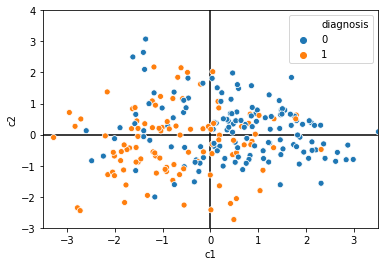

In [158]:
plt.hlines(0, -3.5, 3.5, zorder = -1)
plt.vlines(0, -3, 4, zorder = -1)
plt.axis([-3.5, 3.5, -3, 4])
sns.scatterplot(x = "c1", y = "c2", data = pca_df_train, hue = "diagnosis")
plt.savefig("img/componentes.png", dpi = 700)
#plt.show()

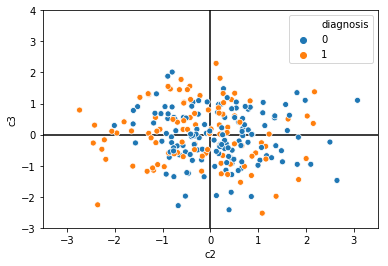

In [166]:
plt.hlines(0, -3.5, 3.5, zorder = -1)
plt.vlines(0, -3, 4, zorder = -1)
plt.axis([-3.5, 3.5, -3, 4])
sns.scatterplot(x = "c2", y = "c3", data = pca_df_train, hue = "diagnosis")
#plt.savefig("img/componentes.png", dpi = 700)

In [170]:
Var_C = pca.explained_variance_ratio_
var_acum = [Var_C[0]]
for i in range(1,len(Var_C)):
    var_acum.append(var_acum[i-1] + Var_C[i])

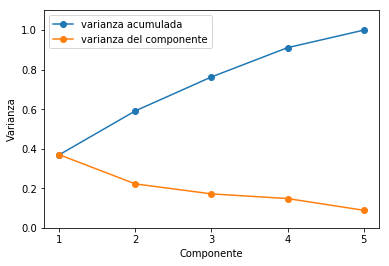

In [177]:
#plt.title("Varianza por Componente")
plt.xlabel("Componente")
plt.ylabel("Varianza")
plt.ylim([0, 1.1])
plt.plot(range(len(var_acum)), var_acum, "-o", label = "varianza acumulada")
plt.plot(range(len(Var_C)), Var_C, "-o", label = "varianza del componente")
plt.xticks(range(0,5),list(range(1,6)))
#plt.vlines(range(len(var_acum)), 0, var_acum, "tab:orange")
plt.legend()
plt.savefig('img/varianza.png', dpi = 300)
plt.show()

## Logit utilizando pca

In [236]:
log_df_train = X_train.iloc[:, 5:].join(pca_df_train)
log_df_test = X_test.iloc[:, 5:].join(pca_df_test)

In [237]:
len(log_df_train)

242

In [238]:
len(y_train)

242

In [239]:
# quitamos las variables categóricas que no eran significativas en el logit normal
log_df_train = log_df_train.drop(columns = ['thal_normal','thal_reversable defect','slope_flat','slope_upsloping'])
log_df_test = log_df_test.drop(columns = ['thal_normal','thal_reversable defect','slope_flat','slope_upsloping'])

In [240]:
log_df_train.head()

,is_male,has_atypical angina,has_non-anginal pain,has_typical angina,ecg_normal,ecg_probable left ventricular hypertrophy,exang_yes,ca_1.0,ca_2.0,ca_3.0,c1,c2,c3,c4,c5,diagnosis
44,0,0,0,0,0,1,0,0,0,0,0.050722,2.025640,0.598633,-0.266100,-0.515623,1
91,0,0,0,0,0,1,0,0,0,1,-2.778952,-2.355824,-2.260099,2.380803,-1.271097,1
162,0,0,1,0,1,0,0,0,0,0,0.519381,-0.890033,0.519522,0.138508,-0.939691,0
110,0,0,0,0,0,1,1,0,0,0,-1.042003,1.229377,0.017819,0.040312,0.137070,1
21,0,0,0,1,0,1,0,0,0,0,-0.458262,1.175942,-0.678821,0.224961,-0.049794,0


In [241]:
log_df_test.head()

,is_male,has_atypical angina,has_non-anginal pain,has_typical angina,ecg_normal,ecg_probable left ventricular hypertrophy,exang_yes,ca_1.0,ca_2.0,ca_3.0,c1,c2,c3,c4,c5,diagnosis
8,1,0,0,0,0,1,0,1,0,0,-0.806422,0.113623,0.153834,-0.237795,-0.607200,1
81,0,0,0,0,0,1,0,0,0,0,0.114953,0.328775,0.389832,-0.299220,0.434788,0
157,1,0,0,0,0,1,0,0,1,0,0.518759,1.472777,0.518269,-0.310960,-0.568664,1
205,1,0,0,0,0,1,1,0,0,1,0.490705,1.236374,0.250914,0.294205,1.342335,1
18,0,0,1,0,1,0,0,0,0,0,0.390135,0.387805,0.580488,-0.115418,0.948023,0


In [242]:
# Guardar los modelos del logit en un arreglo, dependiendo de componentes utilizados
logit_array = []
for i in range(5):
    logit = LogisticRegression(solver = "liblinear", random_state = 155766)
    logit.fit(log_df_train.iloc[:, :(-5+i)], log_df_train["diagnosis"])
    
    # Info de proba usando el logit de statsmodels
    logit_m = sm.Logit(y_train, log_df_train.iloc[:, :(-5+i)], solver = "liblinear")
    logit_m = logit_m.fit()
    print(logit_m.summary())
    
    logit_array.append(logit)

Optimization terminated successfully.
         Current function value: 0.368281
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              diagnosis   No. Observations:                  242
Model:                          Logit   Df Residuals:                      231
Method:                           MLE   Df Model:                           10
Date:                Wed, 08 May 2019   Pseudo R-squ.:                  0.4600
Time:                        11:02:33   Log-Likelihood:                -89.124
converged:                       True   LL-Null:                       -165.05
                                        LLR p-value:                 1.544e-27
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
is_male                                       

In [243]:
# Informacion de todos los logit
for l in range(5):
    print("Logit con "+ str(l+1) + " componentes")
    
    print("Info de train")
    print("Score: ")
    print(logit_array[l].score(log_df_train.iloc[:, :(-5+l)], y_train))

    # Matriz de confusion de train (prediccion en renglones, diagnosis en cols)
    M = np.zeros((2,2), dtype=int)
    pred = logit_array[l].predict(log_df_train.iloc[:, :(-5+l)])
    for i, j in zip(pred, y_train):
        M[i, j] += 1
    print("Matriz de Confusion")
    print(ls.indexedMatrix(M, [0, 1], [0, 1]))
    
    print("Info de test")
    # Aciertos sobre errores de test
    print("Score: ")
    print(logit_array[l].score(log_df_test.iloc[:, :(-5+l)], y_test))

    # Matriz de confusion de test
    M = np.zeros((2,2), dtype=int)
    pred = logit_array[l].predict(log_df_test.iloc[:, :(-5+l)])
    for i, j in zip(pred, y_test):
        M[i, j] += 1
    print(ls.indexedMatrix(M, [0, 1], [0, 1]))
    print("\n")

Logit con 1 componentes
Info de train
Score: 
0.8305785123966942
Matriz de Confusion
\begin{blockarray}{ccc}
 & 0 & 1\\
\begin{block}{c(cc)}
0 & 124 & 26 \\ 
1 & 15 & 77 \\ 
\end{block}
\end{blockarray}
Info de test
Score: 
0.8360655737704918
\begin{blockarray}{ccc}
 & 0 & 1\\
\begin{block}{c(cc)}
0 & 22 & 7 \\ 
1 & 3 & 29 \\ 
\end{block}
\end{blockarray}


Logit con 2 componentes
Info de train
Score: 
0.8305785123966942
Matriz de Confusion
\begin{blockarray}{ccc}
 & 0 & 1\\
\begin{block}{c(cc)}
0 & 124 & 26 \\ 
1 & 15 & 77 \\ 
\end{block}
\end{blockarray}
Info de test
Score: 
0.819672131147541
\begin{blockarray}{ccc}
 & 0 & 1\\
\begin{block}{c(cc)}
0 & 22 & 8 \\ 
1 & 3 & 28 \\ 
\end{block}
\end{blockarray}


Logit con 3 componentes
Info de train
Score: 
0.8305785123966942
Matriz de Confusion
\begin{blockarray}{ccc}
 & 0 & 1\\
\begin{block}{c(cc)}
0 & 124 & 26 \\ 
1 & 15 & 77 \\ 
\end{block}
\end{blockarray}
Info de test
Score: 
0.8032786885245902
\begin{blockarray}{ccc}
 & 0 & 1\\
\be

In [244]:
log_train = log_df_train.drop(columns = ['c2','c3','diagnosis'])
log_test = log_df_test.drop(columns = ['c2','c3','diagnosis'])

logit_m = sm.Logit(y_train, log_train, solver = "liblinear")
logit_m = logit_m.fit()

Optimization terminated successfully.
         Current function value: 0.345995
         Iterations 7


In [245]:
logit_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  242
Model:                          Logit   Df Residuals:                      229
Method:                           MLE   Df Model:                           12
Date:                Wed, 08 May 2019   Pseudo R-squ.:                  0.4927
Time:                        11:03:30   Log-Likelihood:                -83.731
converged:                       True   LL-Null:                       -165.05
                                        LLR p-value:                 1.517e-28
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
is_male                                       2.1121      0.518      4.077      0.000       1.097       3.127
has_atypical angina                          -1.3194      0.616     -2.141      0.032      -2.527      -0.112
has_non-anginal pain                         -1.7751      0.500     -3.549      0.000      -2.755      -0.795
has_typical angina                           -2.3780      0.731     -3.252      0.001      -3.811      -0.945
ecg_normal                                   -2.2096      0.578     -3.822      0.000      -3.343      -1.076
ecg_probable left ventricular hypertrophy    -1.5953      0.560     -2.849      0.004      -2.693      -0.498
exang_yes                                     0.8816      0.492      1.792      0.073      -0.083       1.846
ca_1.0                                        1.7161      0.502      3.421      0.001       0.733       2.699
ca_2.0                                        2.5723      0.715      3.597      0.000       1.171       3.974
ca_3.0                                        2.2257      0.933      2.386      0.017       0.397       4.054
c1                                           -0.7236      0.204     -3.544      0.000      -1.124      -0.323
c4                                            0.5788      0.245      2.365      0.018       0.099       1.058
c5                                            0.6464      0.345      1.876      0.061      -0.029       1.322
=============================================================================================================
"""

In [246]:
logit = LogisticRegression(solver = "liblinear", random_state = 158999)
logit.fit(log_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=158999, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [247]:
print("Info de train")
print("Score: ")
print(logit.score(log_train, y_train))

# Matriz de confusion de train (prediccion en renglones, diagnosis en cols)
train_pred = logit.predict(log_train)
print(confusion_matrix(y_train,train_pred))

print("Info de test")
# Aciertos sobre errores de test
print("Score: ")
print(logit.score(log_test, y_test))

# Matriz de confusion de test
test_pred = logit.predict(log_test)
print(confusion_matrix(y_test,test_pred))

Info de train
Score: 
0.8347107438016529
[[125  14]
 [ 26  77]]
Info de test
Score: 
0.819672131147541
[[23  2]
 [ 9 27]]
